## Loop model with crossing
* [https://arxiv.org/pdf/1303.2342.pdf](https://arxiv.org/pdf/1303.2342.pdf)

In [1]:
using Random
using Statistics
using PyPlot
using JLD2, FileIO

In [2]:
function product_state(n)
    state = Array{Int}(1:n)
    state[1:2:end], state[2:2:end] = state[2:2:end], state[1:2:end]
    return state
end

function one_layer_update!(state, p, q)
    n = size(state, 1)
    for i in 1:2:n
        j =  i%n+1
        a, b = state[i], state[j]
        (a == j) && continue
        if rand() < p
            state[i], state[j] = b, a
            state[a], state[b] = j, i
        elseif rand() < q
            state[a], state[b] = b, a
            state[i], state[j] = j, i
        end
    end
    for i in 2:2:n
        j =  i%n+1
        a, b = state[i], state[j]
        (a == j) && continue
        if rand() < p
            state[i], state[j] = b, a
            state[a], state[b] = j, i
        elseif rand() < 1-q
            state[a], state[b] = b, a
            state[i], state[j] = j, i
        end
    end
    return state
end

function correlation_across_all_cuts(state)
    n = size(state, 1)
    results = zeros(Int, n)
    current_val = 0
    for i in 1:n
        if state[i] > i
            current_val += 1
        else
            current_val -= 1
        end
        results[i] = current_val
    end
    return results
end

function arc_length_statistics(state)
    n = size(state, 1)
    result = zeros(Int, n)
    for i in 1:n
        if state[i] > i
            result[state[i] - i] += 1
        end
    end
    return result
end


function search_epr!(state, left, right, epr_counter)
    n = div(size(state, 1), 2)
    this_is_epr = true
    s = left
    while (s <= right)
        i, j = state[2s-1], state[2s]
        si, sj = div(i + 1, 2), div(j + 1, 2)
        if (si > s) && (si == sj) && (left <= si <= right)
            is_epr = search_epr!(state, min(si, s) + 1, max(si, s) - 1, epr_counter)
            if is_epr
                d = abs(si - s)
                epr_counter[min(d, n - d)] += 1 
            end
            s = max(s, si) + 1
        else
            if (si < left) || (si > right) || (sj < left) || (sj > right)
                this_is_epr = false
            end
            s += 1
        end
    end
    return this_is_epr
end 

function draw_arcs(state)
    parc = matplotlib.patches.Arc
    fg, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.set_xlim(0, size(state, 1)+1)
    ax.set_ylim(0, size(state, 1))
    for i in 1: size(state, 1)
        a, b = i, state[i]
        (i > state[i]) && continue
        c = (a+b)/2
        r = abs(a-b)
        arc = parc((c, 0), r, r, angle=0, theta1=0, theta2=180)
        ax.add_patch(arc)
    end
    return fg, ax
end

draw_arcs (generic function with 1 method)

a = 100000.0
a = 200000.0
a = 300000.0
a = 400000.0
a = 500000.0
a = 600000.0
a = 700000.0
a = 800000.0
a = 900000.0
a = 1.0e6
a = 1.1e6
a = 1.2e6
a = 1.3e6
a = 1.4e6
a = 1.5e6
a = 1.6e6
a = 1.7e6
a = 1.8e6
a = 1.9e6
a = 2.0e6
a = 2.1e6
a = 2.2e6
a = 2.3e6
a = 2.4e6
a = 2.5e6
a = 2.6e6
a = 2.7e6
a = 2.8e6
a = 2.9e6
a = 3.0e6
a = 3.1e6
a = 3.2e6
a = 3.3e6
a = 3.4e6
a = 3.5e6
a = 3.6e6
a = 3.7e6
a = 3.8e6
a = 3.9e6
a = 4.0e6
a = 4.1e6
a = 4.2e6
a = 4.3e6
a = 4.4e6
a = 4.5e6
a = 4.6e6
a = 4.7e6
a = 4.8e6
a = 4.9e6
a = 5.0e6
a = 5.1e6
a = 5.2e6
a = 5.3e6
a = 5.4e6
a = 5.5e6
a = 5.6e6
a = 5.7e6
a = 5.8e6
a = 5.9e6
a = 6.0e6
a = 6.1e6
a = 6.2e6
a = 6.3e6
a = 6.4e6
a = 6.5e6
a = 6.6e6
a = 6.7e6
a = 6.8e6
a = 6.9e6
a = 7.0e6
a = 7.1e6
a = 7.2e6
a = 7.3e6
a = 7.4e6
a = 7.5e6
a = 7.6e6
a = 7.7e6
a = 7.8e6
a = 7.9e6
a = 8.0e6
a = 8.1e6
a = 8.2e6
a = 8.3e6
a = 8.4e6
a = 8.5e6
a = 8.6e6
a = 8.7e6
a = 8.8e6
a = 8.9e6
a = 9.0e6
a = 9.1e6
a = 9.2e6
a = 9.3e6
a = 9.4e6
a = 9.5e6
a = 9.6e6
a = 9.7e6
a =

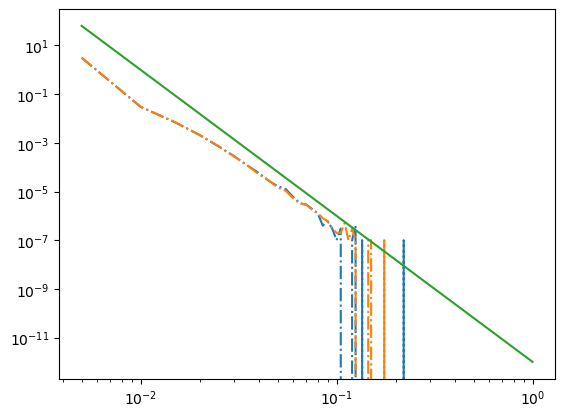

a = 1.0e7


In [5]:
Random.seed!(1111)
n = 200
m = 200
p = 0.5
q = 0.5

lag = 5 * n
step = 10
t = 1e7

result1 = zeros(Int, n)
result2 = zeros(Int, m)
state1 = product_state(2n)
state2 = product_state(2m)


for _ in 1:lag
    one_layer_update!(state1, p, q)
    one_layer_update!(state2, p, q)
end

for a in 1:t
    if a % 1e5 == 0
        @show a
    end
    for _ in 1:step   
        one_layer_update!(state1, p, q)
        one_layer_update!(state2, p, q)
    end
    search_epr!(state1, 1, n, result1)
    search_epr!(state2, 1, m, result2)
end

result1 = (result1 ./ t)
result2 = (result2 ./ t)

plot((1:n) ./ n, result1, "-.")
plot((1:m) ./ m, result2, "-.")
plot((1:m) ./ m, 1e-12 * ((1:m) ./ m).^(-6))
xscale("log")
yscale("log")

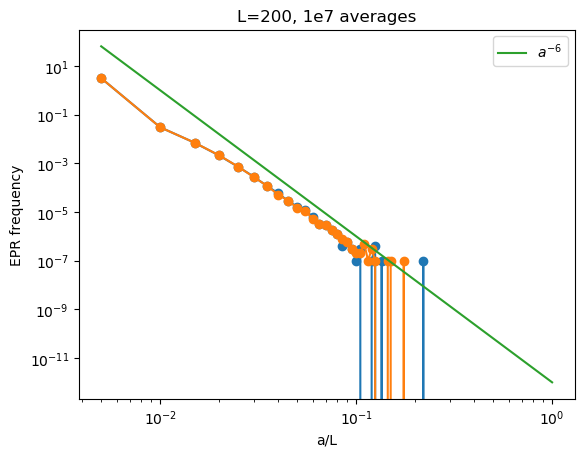

In [15]:
plot((1:n) ./ n, result1, "-o")
plot((1:m) ./ m, result2, "-o")
plot((1:m) ./ m, 1e-12 * ((1:m) ./ m).^(-6), label=L"$a^{-6}$")
legend()
xlabel("a/L") 
ylabel("EPR frequency")
title("L=200, 1e7 averages")
xscale("log")
yscale("log")

a = 100000.0
a = 200000.0
a = 300000.0
a = 400000.0
a = 500000.0
a = 600000.0
a = 700000.0
a = 800000.0
a = 900000.0


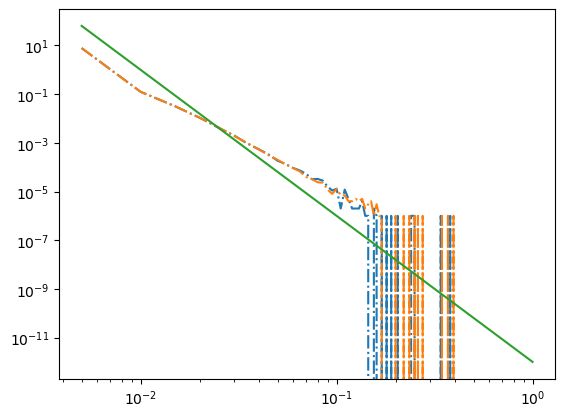

a = 1.0e6


In [27]:
Random.seed!(1111)
n = 200
m = 200
p = 0.5
q = 0.823

lag = 5 * n
step = 10
t = 1e6

result1 = zeros(Int, n)
result2 = zeros(Int, m)
state1 = product_state(2n)
state2 = product_state(2m)


for _ in 1:lag
    one_layer_update!(state1, p, q)
    one_layer_update!(state2, p, q)
end

for a in 1:t
    if a % 1e5 == 0
        @show a
    end
    for _ in 1:step   
        one_layer_update!(state1, p, q)
        one_layer_update!(state2, p, q)
    end
    search_epr!(state1, 1, n, result1)
    search_epr!(state2, 1, m, result2)
end

result1 = (result1 ./ t)
result2 = (result2 ./ t)

plot((1:n) ./ n, result1, "-.")
plot((1:m) ./ m, result2, "-.")
plot((1:m) ./ m, 1e-12 * ((1:m) ./ m).^(-6))
xscale("log")
yscale("log")

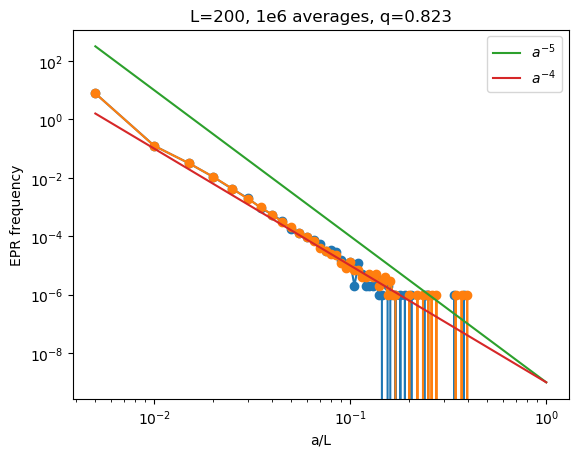

In [29]:
plot((1:n) ./ n, result1, "-o")
plot((1:m) ./ m, result2, "-o")
plot((1:m) ./ m, 1e-9 * ((1:m) ./ m).^(-5), label=L"$a^{-5}$")
plot((1:m) ./ m, 1e-9 * ((1:m) ./ m).^(-4), label=L"$a^{-4}$")
legend()
xlabel("a/L") 
ylabel("EPR frequency")
title("L=200, 1e6 averages, q=0.823")
xscale("log")
yscale("log")

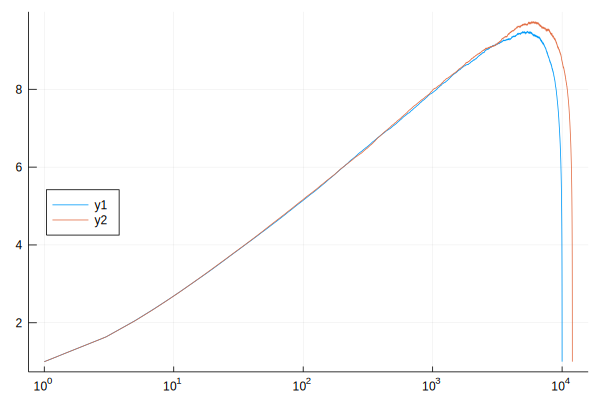

In [9]:
Random.seed!(1111)
n = 200
m = 200
p = 0.5
q = 0.823

lag = 5 * n
step = 10
t = 1e6

result1 = zeros(Int, n)
result2 = zeros(Int, m)
state1 = product_state(2n)
state2 = product_state(2m)


for _ in 1:lag
    one_layer_update!(state1, p, q)
    one_layer_update!(state2, p, q)
end

for a in 1:t
    if a % 1e5 == 0
        @show a
    end
    for _ in 1:step   
        one_layer_update!(state1, p, q)
        one_layer_update!(state2, p, q)
    end
    search_epr!(state1, 1, n, result1)
    search_epr!(state2, 1, m, result2)
end

result1 = (result1 ./ t)
result2 = (result2 ./ t)

plot((1:n) ./ n, result1, "-.")
plot((1:m) ./ m, result2, "-.")
plot((1:m) ./ m, 1e-12 * ((1:m) ./ m).^(-6))
xscale("log")
yscale("log")

In [3]:
function zzx_update!(state)
    n = size(state, 1)
    N=n
    for i in 1:2:n
        j = (i)%N+1
        a, b = state[i], state[j]
        (a == j) && continue
        if rand() < 0.5
            state[a], state[b] = b, a
            state[i], state[j] = j, i
        end
    end
    for i in 2:2:n
        j = (i)%N+1
        a, b = state[i], state[j]
        (a == j) && continue
        if rand() < 0.5
            state[a], state[b] = b, a
            state[i], state[j] = j, i
        end
    end
    return state
end

function GHZ_size_hist(state, w, m)
    n = size(state, 1)
    lens = Int[]
    read = [false for  _ in state]
    for i in 1:2:n
        read[i] && continue
        k = i
        count = 0
        while true
            read[k] = true
            count += 1
            k = state[k+1]
            if read[k]
                push!(lens, count+1)
                break
            end
        end
    end
    hist = [0 for i in 1:w:m]
    for c in lens
        (c < m) && (hist[div(c, w)+1] += 1)
    end
    return hist
end

function sim_run(state, step)
    n = size(state, 1)
    for _ in 1:step
        zzx_update!(state)
    end
end

function socalled_neg(state, area1, area2)
    mask = [(state[i] in area2) for i in area1]
    return sum(mask)
end

function neg_across_all_cut(state, rd_list, N)
    tmp = [socalled_neg(state, 1:rd, div(N,2)+1:div(N,2)+rd) for rd in rd_list]
    return tmp
end

neg_across_all_cut (generic function with 1 method)

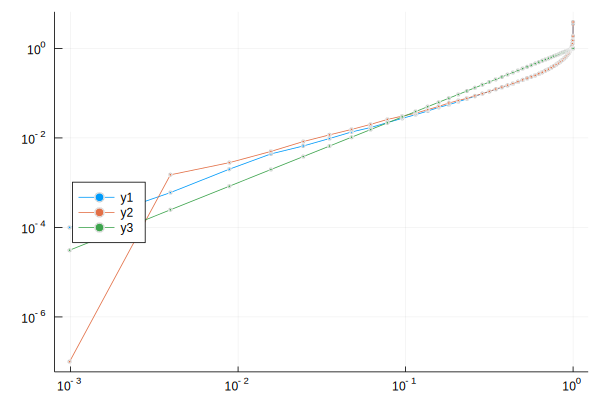

In [30]:
N1 = 200
N2 = 400

rd_list1 = 2:2:100
rd_list2 = 4:4:200

lag = 10 * N2
step = N2
t = 10000

result1 = zeros(Int, length(rd_list1))
result2 = zeros(Int, length(rd_list2))
state1 = product_state(N1)
state2 = product_state(N2)


for _ in 1:lag
    zzx_update!(state1)
    zzx_update!(state2)
end
for a in 1:t
    for _ in 1:step   
        zzx_update!(state1)
        zzx_update!(state2)
    end
    result1 += neg_across_all_cut(state1, rd_list1, N1)
    result2 += neg_across_all_cut(state2, rd_list2, N2)
end

result1 = (result1 ./ t)
result2 = (result2 ./ t)

l1 = x -> sin(π*(x/N1))^2
l2 = x -> sin(π*(x/N2))^2


eps = 1e-7
plot(xaxis=:log, yaxis=:log)
plot!(l1.(rd_list1), result1 .+ 1e-7, marker=2)
plot!(l2.(rd_list2), result2 .+ 1e-7, marker=2)
plot!(l2.(rd_list2), l2.(rd_list2).^1.5, marker=2)
plot!(legend=:left)

In [17]:
n_step = 10000
w = 20
m = 1000
tmp = []

plot()
for N in [10000, 8000]
    state = product_state(N)
    sim_run(state, 2000)
    h = [0 for _ in 1:w:m]
    for _ in 1:n_step
        h += GHZ_size_hist(state, w, m)
        sim_run(state, 256)
    end
    push!(tmp, h ./ N ./ n_step)
end

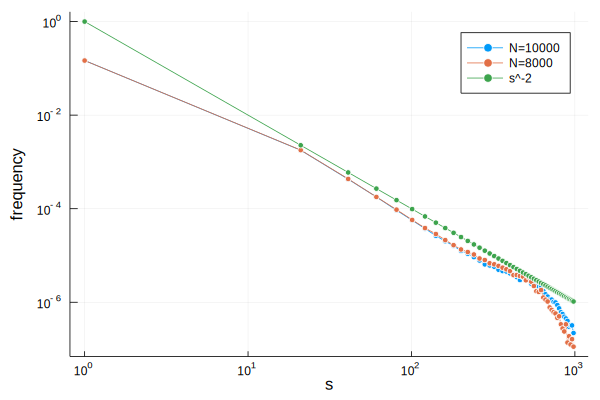

In [29]:
plot()
N_list = [10000, 8000]
for i in 1:2
    plot!(1:w:m, tmp[i] .+ 1e-7, marker=4, label=string("N=", N_list[i]), markerstrokewidth=0)
end
plot!(1:w:m, (1:w:m).^-2, marker=4, label="s^-2", markerstrokewidth=0)
plot!(xaxis=:log, yaxis=:log)
plot!(xlabel="s", ylabel="frequency")

In [7]:
function spin_negativity(state, spin_region1, spin_region2)
    prev(i) = div(state[2i-1], 2)
    next(i) = div(state[2i]+1, 2)
    region12 = union(spin_region1, spin_region2)
    ng = 0
    for i in spin_region1
        !(prev(i) in spin_region2) && continue
        j = i
        while (j in region12)
            j = next(j)
            if j == i
                ng += 1
                break
            end
        end
    end
    return ng
end

N1 = 1000
N2 = 2000
lag = 10000
n_step = 500000
step_size = 32

r_list1 = 10:10:500
r_list2 = 20:20:1000

ng1 = [0 for _ in r_list1]
ng2 = [0 for _ in r_list2]

state1 = product_state(2N1)
state2 = product_state(2N2)
sim_run(state1, lag)
mid1 = div(N1, 2)
mid2 = div(N2, 2)
for _ in 1:n_step
    ng1 += [spin_negativity(state1, 1:r_list1[i], (mid1+1):(mid1+r_list1[i])) for i in 1:length(r_list1)]
    ng2 += [spin_negativity(state2, 1:r_list2[i], (mid2+1):(mid2+r_list2[i])) for i in 1:length(r_list2)]
    sim_run(state1, step_size)
    sim_run(state2, step_size)
end

ng1 = ng1 ./ n_step
ng2 = ng2 ./ n_step 

50-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 2.0e-6  
 8.0e-6  
 2.4e-5  
 5.0e-5  
 7.8e-5  
 0.000128
 0.00019 
 0.000262
 0.000374
 ⋮       
 0.061018
 0.071724
 0.084532
 0.099944
 0.11866 
 0.14149 
 0.17058 
 0.209186
 0.2627  
 0.344772
 0.497532
 2.58395 

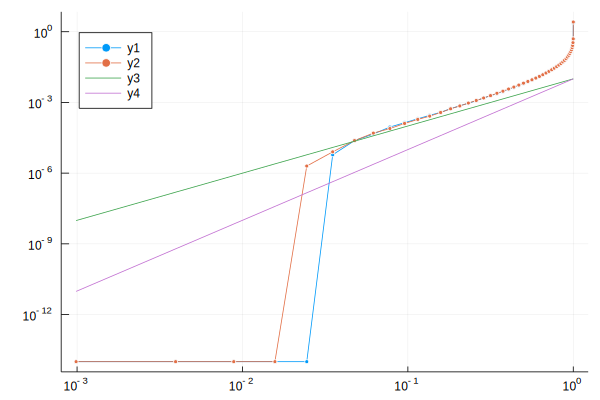

In [9]:
l1 = x -> sin(π*(x/N1))^2
l2 = x -> sin(π*(x/N2))^2
plot()
eps=1e-14
plot!(l1.(r_list1), ng1 .+ eps, marker=3, markerstrokewidth=0)
plot!(l2.(r_list2), ng2 .+ eps, marker=3, markerstrokewidth=0)
plot!(l1.(r_list1), 0.01 * l1.(r_list1).^2)
plot!(l1.(r_list1), 0.01 * l1.(r_list1).^3)
plot!(xaxis=:log, yaxis=:log, legend=:topleft)

In [29]:
state = product_state(10)
sim_run(state, 100)
state

10-element Array{UInt64,1}:
 0x000000000000000a
 0x0000000000000003
 0x0000000000000002
 0x0000000000000005
 0x0000000000000004
 0x0000000000000007
 0x0000000000000006
 0x0000000000000009
 0x0000000000000008
 0x0000000000000001

In [24]:
function spin_negativity(state, spin_region1, spin_region2)
    prev(i) = div(state[2i-1], 2)
    next(i) = div(state[2i]+1, 2)
    region12 = union(spin_region1, spin_region2)
    ng = 0
    for i in spin_region1
        !(prev(i) in spin_region2) && continue
        j = i
        while (j in region12)
            j = next(j)
            if j == i
                ng += 1
                break
            end
        end
    end
    return ng
end

function main()
    N1 = 400
    N2 = 800
    lag = 10000
    n_step = 1000000
    step_size = 32

    r_list1 = union(2:2:50, 100:10:200)
    r_list2 = union(4:4:100, 200:20:400)

    ng1 = [0 for _ in r_list1]
    ng2 = [0 for _ in r_list2]

    state1 = product_state(2N1)
    state2 = product_state(2N2)
    sim_run(state1, lag)
    mid1 = div(N1, 2)
    mid2 = div(N2, 2)
    for t in 1:n_step
        if t % 10000 ==0
            print(t)
        end
        ng1 += [spin_negativity(state1, 1:r_list1[i], (mid1+1):(mid1+r_list1[i])) for i in 1:length(r_list1)]
        ng2 += [spin_negativity(state2, 1:r_list2[i], (mid2+1):(mid2+r_list2[i])) for i in 1:length(r_list2)]
        sim_run(state1, step_size)
        sim_run(state2, step_size)
    end

    ng1 = ng1 ./ n_step
    ng2 = ng2 ./ n_step
    return ng1, ng2
end

ng1, ng2 = main()

1000020000300004000050000600007000080000900001000001100001200001300001400001500001600001700001800001900002000002100002200002300002400002500002600002700002800002900003000003100003200003300003400003500003600003700003800003900004000004100004200004300004400004500004600004700004800004900005000005100005200005300005400005500005600005700005800005900006000006100006200006300006400006500006600006700006800006900007000007100007200007300007400007500007600007700007800007900008000008100008200008300008400008500008600008700008800008900009000009100009200009300009400009500009600009700009800009900001000000

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0e-6, 9.0e-6  …  0.009578, 0.014578, 0.021761, 0.03172, 0.046791, 0.069395, 0.104413, 0.163969, 0.287996, 2.139197], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0e-6, 4.0e-6, 4.0e-6, 5.0e-6  …  0.0098, 0.014944, 0.022239, 0.032812, 0.048187, 0.071029, 0.106805, 0.167422, 0.293611, 2.330517])

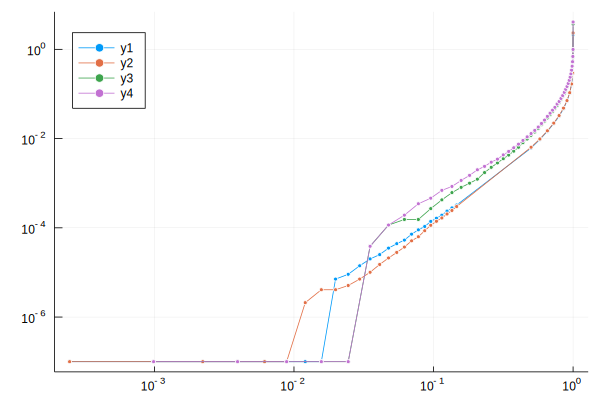

In [34]:
N1 = 400
N2 = 800
r_list1 = union(2:2:50, 100:10:200)
r_list2 = union(4:4:100, 200:20:400)

l1 = x -> sin(π*(x/N1))^2
l2 = x -> sin(π*(x/N2))^2
plot()
eps=1e-7
plot!(l1.(r_list1), ng1 .+ eps, marker=3, markerstrokewidth=0)
plot!(l2.(r_list2), ng2 .+ eps, marker=3, markerstrokewidth=0)
# plot!(l1.(r_list1), 0.01 * l1.(r_list1).^2)
# plot!(l1.(r_list1), 0.01 * l1.(r_list1).^3)
# plot!(xaxis=:log, yaxis=:log, legend=:topleft)

@load "./neg_50zz_sym.jld2" neg_50zz_sym
results1, results2 = neg_50zz_sym

rd_list1 = 2:2:100
rd_list2 = 4:4:200
N1, N2 = 200, 400

neg1 = mean([a[2] for a in results1])
neg2 = mean([a[2] for a in results2])

l1 = x -> sin(π*(x/N1))^2
l2 = x -> sin(π*(x/N2))^2

plot!(l1.(rd_list1), neg1 .+ eps, marker=3, markerstrokewidth=0)
plot!(l2.(rd_list2), neg2 .+ eps, marker=3, markerstrokewidth=0)

plot!(xaxis=:log, yaxis=:log, legend=:topleft)

In [24]:
Random.seed!(1111)
n = 800
p = 0.5
q = 0.823

lag = 5 * n
step = 10
t = 1e7

result1 = zeros(Int, n)
state1 = product_state(2n)


for _ in 1:lag
    one_layer_update!(state1, p, q)
end

for a in 1:t
    if a % 1e5 == 0
        @show a
    end
    for _ in 1:step   
        one_layer_update!(state1, p, q)
    end
    search_epr!(state1, 1, n, result1)
end

result = (result1 ./ t)
@save "./cache/MN_800_p500_q823.jld2" result

a = 100000.0
a = 200000.0
a = 300000.0
a = 400000.0
a = 500000.0
a = 600000.0
a = 700000.0
a = 800000.0
a = 900000.0
a = 1.0e6
a = 1.1e6
a = 1.2e6
a = 1.3e6
a = 1.4e6
a = 1.5e6
a = 1.6e6
a = 1.7e6
a = 1.8e6
a = 1.9e6
a = 2.0e6
a = 2.1e6
a = 2.2e6
a = 2.3e6
a = 2.4e6
a = 2.5e6
a = 2.6e6
a = 2.7e6
a = 2.8e6
a = 2.9e6
a = 3.0e6
a = 3.1e6
a = 3.2e6
a = 3.3e6
a = 3.4e6
a = 3.5e6
a = 3.6e6
a = 3.7e6
a = 3.8e6
a = 3.9e6
a = 4.0e6
a = 4.1e6
a = 4.2e6
a = 4.3e6
a = 4.4e6
a = 4.5e6
a = 4.6e6
a = 4.7e6
a = 4.8e6
a = 4.9e6
a = 5.0e6
a = 5.1e6
a = 5.2e6
a = 5.3e6
a = 5.4e6
a = 5.5e6
a = 5.6e6
a = 5.7e6
a = 5.8e6
a = 5.9e6
a = 6.0e6
a = 6.1e6
a = 6.2e6
a = 6.3e6
a = 6.4e6
a = 6.5e6
a = 6.6e6
a = 6.7e6
a = 6.8e6
a = 6.9e6
a = 7.0e6
a = 7.1e6
a = 7.2e6
a = 7.3e6
a = 7.4e6
a = 7.5e6
a = 7.6e6
a = 7.7e6
a = 7.8e6
a = 7.9e6
a = 8.0e6
a = 8.1e6
a = 8.2e6
a = 8.3e6
a = 8.4e6
a = 8.5e6
a = 8.6e6
a = 8.7e6
a = 8.8e6
a = 8.9e6
a = 9.0e6
a = 9.1e6
a = 9.2e6
a = 9.3e6
a = 9.4e6
a = 9.5e6
a = 9.6e6
a = 9.7e6
a =

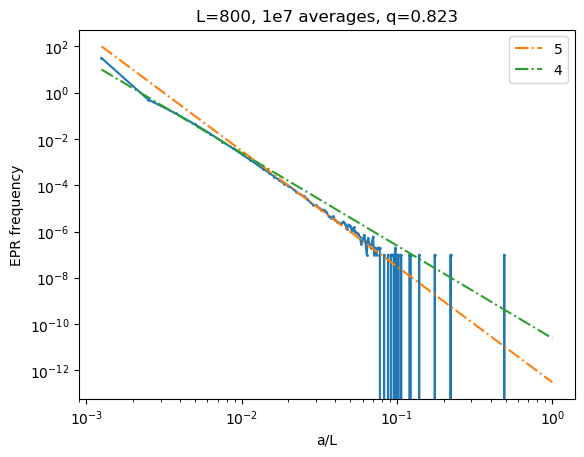

In [13]:
@load "./cache/MN_800_p500_q823.jld2" result
n = 800
plot((1:n) ./ n, result, "-o",markersize=1)
plot((1:n) ./ n, 100*(1:n).^(-5), "-.",label=5)
plot((1:n) ./ n, 10*(1:n).^(-4), "-.", label=4)
legend()
xlabel("a/L") 
ylabel("EPR frequency")
title("L=800, 1e7 averages, q=0.823")
# ylim(1e-7, 10)
# xlim(1e-3, 1e-1)
xscale("log")
yscale("log")

In [ ]:
Random.seed!(1111)
n = 800
p = 0.5
q = 0.177

lag = 5 * n
step = 10
t = 1e7

result1 = zeros(Int, n)
state1 = product_state(2n)


for _ in 1:lag
    one_layer_update!(state1, p, q)
end

for a in 1:t
    if a % 1e5 == 0
        @show a
    end
    for _ in 1:step   
        one_layer_update!(state1, p, q)
    end
    search_epr!(state1, 1, n, result1)
end

result = (result1 ./ t)
@save "./cache/MN_800_p500_q177.jld2" result

a = 100000.0


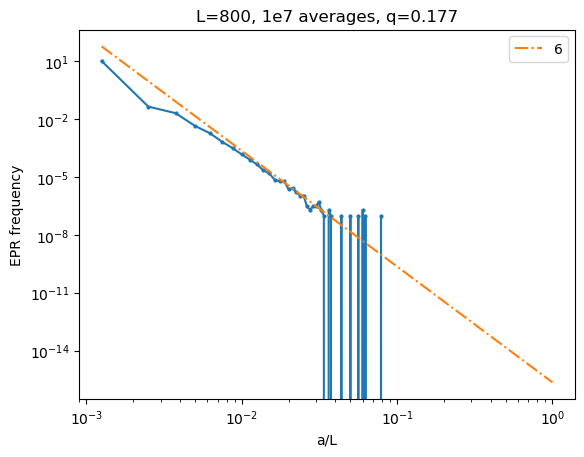

In [20]:
@load "./cache/MN_800_p500_q177.jld2" result
n = 800
plot((1:n) ./ n, result, "-o",markersize=2)
plot((1:n) ./ n, 60*(1:n).^(-6), "-.",label=6)
# plot((1:n) ./ n, (1:n).^(-4), "-.", label=4)
legend()
xlabel("a/L") 
ylabel("EPR frequency")
title("L=800, 1e7 averages, q=0.177")
xscale("log")
yscale("log")